In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# from dask import dataframe as dapd


from os import path, mkdir, walk, chdir, scandir
from datetime import datetime, timedelta, date
from random import sample, randint
from math import pow, floor


from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

%matplotlib inline

2022-09-05 17:47:56.743837: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [4]:
now = datetime.now()
print('====================================================================================')
print('*******************     Forcasting Battery Charge       **************************')
print('                          ' + now.strftime("%Y-%m-%d %H:%M:%S"))
print()

*******************     Forcasting Battery Charge       **************************
                          2022-09-05 17:48:17



In [5]:
path_data = './favorita-grocery-sales-forecasting/'

perfix = '' 
file_name =  '' 

# chdir(path_data)

In [6]:
t_stamp = now.strftime('%Y%m%d_%H%M%S')
print('Time Stamp: ', t_stamp)

saved_t_stamp = '' # 
New_training = True


dir_path = './'
fn_dataset = 'combined_dataset_frac.csv' #'combined_datasets.csv' 


# Select new training or reading saved trained model

if New_training:
    checkpoint_path = t_stamp + '_checkpoint'
    model_load_timestamp = ''
    fn_scaler = t_stamp + '_scaler.pkl'
else:
    checkpoint_path = saved_t_stamp + '_checkpoint' 
    model_load_timestamp = saved_t_stamp
    fn_scaler = saved_t_stamp + '_scaler.pkl'
    
    

model_load_fn =  model_load_timestamp + '_FC_model'

Time Stamp:  20220905_174817


In [7]:
# list files in Kaggle data folder

with scandir() as bag:
    for obj in bag:
        if obj.is_file():
            print(obj.name)

BatteryPredic_DataCleaning_v07.ipynb
1-GrocerySales_EDA_Dask_v01.ipynb
1-GrocerySales_EDA_v01.ipynb
2-Model.ipynb
Advanced Analytics_Data Science Skills Interview_Forecasting (1).pdf
Battery_ML_Prediction_Model_v02.ipynb
Battery_Prediction_Model_v08.1.ipynb
Battery_Prediction_Model_v08.5.ipynb
Battery_Prediction_Model_v08.ipynb
Battery_Prediction_v04.ipynb
checkpoint
FC_v01.png
findings.doc
kaggle.com-Corporación Favorita Grocery Sales Forecasting.pdf
MinMaxScaler.state
StandardScaler.state


# Load Dataset

In [8]:

# df_iunit = pd.read_csv('combined_i_unit.csv', sep=',', header='infer', index_col= 0 )
df_iunit = pd.read_csv(path_data+fn_dataset, sep=',', header='infer', index_col= 0 )
df_iunit

,store_nbr,item_nbr,unit_sales,onpromotion,family,class,perishable,city,state,type,cluster,dcoilwtico,locale,holiday,year,month,day,weekday,int_unit
37017899,28,1080756,1.0,0,GROCERY I,1038,0,Guayaquil,Guayas,E,10,49.46,Working,0,2015,10,8,3,1
5364958,44,1152464,3.0,0,CLEANING,3014,0,Quito,Pichincha,A,5,101.48,National,1,2014,7,12,5,1
9847062,44,1137146,19.0,0,GROCERY I,1074,0,Quito,Pichincha,A,5,91.46,Working,0,2014,9,22,0,1
55289915,39,664545,1.0,1,PERSONAL CARE,4126,0,Cuenca,Azuay,B,6,46.22,National,1,2016,5,13,4,1
44461203,26,1904678,3.0,0,BEVERAGES,1138,0,Guayaquil,Guayas,D,10,36.36,Working,0,2015,12,28,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69546994,4,939131,2.0,0,DAIRY,2104,1,Quito,Pichincha,D,9,49.76,National,1,2016,10,9,6,1
5477506,23,807493,13.0,0,BEVERAGES,1124,0,Ambato,Tungurahua,D,9,101.73,Working,0,2014,7,14,0,1
68403758,17,208514,6.0,0,GROCERY I,1010,0,Quito,Pichincha,C,12,44.65,Working,0,2016,9,27,1,1
26386113,45,1457185,7.0,0,HOME CARE,3106,0,Quito,Pichincha,A,11,61.30,Working,0,2015,6,2,1,1


## Set type of categorical variables and convert hour to its sin-cos components

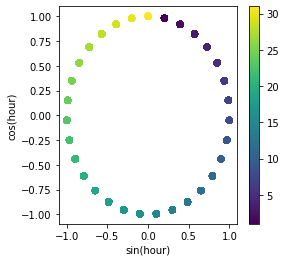

In [9]:
# Store categorical variables as category type
# ==============================================================================
df_iunit['family']   = df_iunit['family'].astype('category')
df_iunit['city'] = df_iunit['city'].astype('category')
df_iunit['locale'] = df_iunit['locale'].astype('category')


# Transformation sine-cosine of variable month, day
# ==============================================================================
df_iunit['mnth_sin'] = np.sin(df_iunit['month'] / 12 * 2 * np.pi).round(decimals=4)
df_iunit['mnth_cos'] = np.cos(df_iunit['month'] / 12 * 2 * np.pi).round(decimals=4)

df_iunit['day_sin'] = np.sin(df_iunit['day'] / 31 * 2 * np.pi).round(decimals=4)
df_iunit['day_cos'] = np.cos(df_iunit['day'] / 31 * 2 * np.pi).round(decimals=4)




# Plot of the transformation
# ==============================================================================
fig, ax = plt.subplots(figsize=(4, 4))
sp = ax.scatter(df_iunit["day_sin"], df_iunit["day_cos"], c=df_iunit["day"])
ax.set(xlabel="sin(hour)", ylabel="cos(hour)")
_ = fig.colorbar(sp)



In [10]:
df_iunit

,store_nbr,item_nbr,unit_sales,onpromotion,family,class,perishable,city,state,type,...,holiday,year,month,day,weekday,int_unit,mnth_sin,mnth_cos,day_sin,day_cos
37017899,28,1080756,1.0,0,GROCERY I,1038,0,Guayaquil,Guayas,E,...,0,2015,10,8,3,1,-0.866,0.500,0.9987,-0.0506
5364958,44,1152464,3.0,0,CLEANING,3014,0,Quito,Pichincha,A,...,1,2014,7,12,5,1,-0.500,-0.866,0.6514,-0.7588
9847062,44,1137146,19.0,0,GROCERY I,1074,0,Quito,Pichincha,A,...,0,2014,9,22,0,1,-1.000,-0.000,-0.9681,-0.2507
55289915,39,664545,1.0,1,PERSONAL CARE,4126,0,Cuenca,Azuay,B,...,1,2016,5,13,4,1,0.500,-0.866,0.4853,-0.8743
44461203,26,1904678,3.0,0,BEVERAGES,1138,0,Guayaquil,Guayas,D,...,0,2015,12,28,0,1,-0.000,1.000,-0.5713,0.8208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69546994,4,939131,2.0,0,DAIRY,2104,1,Quito,Pichincha,D,...,1,2016,10,9,6,1,-0.866,0.500,0.9681,-0.2507
5477506,23,807493,13.0,0,BEVERAGES,1124,0,Ambato,Tungurahua,D,...,0,2014,7,14,0,1,-0.500,-0.866,0.2994,-0.9541
68403758,17,208514,6.0,0,GROCERY I,1010,0,Quito,Pichincha,C,...,0,2016,9,27,1,1,-1.000,-0.000,-0.7248,0.6890
26386113,45,1457185,7.0,0,HOME CARE,3106,0,Quito,Pichincha,A,...,0,2015,6,2,1,1,0.000,-1.000,0.3944,0.9190


In [11]:
mm_scaler = MinMaxScaler()
st_scaler = StandardScaler()


In [12]:
df_iunit[['store_nbr', 'class', 'cluster', 'weekday']] = mm_scaler.fit_transform(df_iunit[['store_nbr', 'class', 'cluster', 'weekday']])

df_iunit[['item_nbr', 'dcoilwtico']] = st_scaler.fit_transform(df_iunit[['item_nbr', 'dcoilwtico']])

df_iunit = pd.get_dummies(df_iunit, columns=['family', 'city', 'locale', 'type'])


joblib.dump(mm_scaler, 'MinMaxScaler.state')
joblib.dump(st_scaler, 'StandardScaler.state')

# mm_scaler = joblib.load('MinMaxScaler.state')
# mm_scaler.transform(df_test)

['StandardScaler.state']

In [13]:
df_iunit.drop(columns=['year', 'month', 'day', 'state'], inplace=True)

df_iunit

,store_nbr,item_nbr,unit_sales,onpromotion,class,perishable,cluster,dcoilwtico,holiday,weekday,...,city_Santo Domingo,locale_Local,locale_National,locale_Regional,locale_Working,type_A,type_B,type_C,type_D,type_E
37017899,0.509434,0.101606,1.0,0,0.005311,0,0.5625,-0.238105,0,0.500000,...,0,0,0,0,1,0,0,0,0,1
5364958,0.811321,0.236760,3.0,0,0.296843,0,0.2500,2.597745,1,0.833333,...,0,0,1,0,0,1,0,0,0,0
9847062,0.811321,0.207889,19.0,0,0.010623,0,0.2500,2.051509,0,0.000000,...,0,0,0,0,1,1,0,0,0,0
55289915,0.716981,-0.682864,1.0,1,0.460903,0,0.3125,-0.414732,1,0.666667,...,0,0,1,0,0,0,1,0,0,0
44461203,0.471698,1.654524,3.0,0,0.020065,0,0.5625,-0.952247,0,0.000000,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69546994,0.056604,-0.165327,2.0,0,0.162585,1,0.5000,-0.221751,1,1.000000,...,0,0,1,0,0,0,0,0,1,0
5477506,0.415094,-0.413437,13.0,0,0.017999,0,0.5000,2.611374,0,0.000000,...,0,0,0,0,1,0,0,0,1,0
68403758,0.301887,-1.542385,6.0,0,0.001180,0,0.6875,-0.500320,0,0.166667,...,0,0,0,0,1,0,0,1,0,0
26386113,0.830189,0.811094,7.0,0,0.310416,0,0.6250,0.407348,0,0.166667,...,0,0,0,0,1,1,0,0,0,0


In [14]:
df_iunit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10171284 entries, 37017899 to 76826939
Data columns (total 79 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   store_nbr                          float64
 1   item_nbr                           float64
 2   unit_sales                         float64
 3   onpromotion                        int64  
 4   class                              float64
 5   perishable                         int64  
 6   cluster                            float64
 7   dcoilwtico                         float64
 8   holiday                            int64  
 9   weekday                            float64
 10  int_unit                           int64  
 11  mnth_sin                           float64
 12  mnth_cos                           float64
 13  day_sin                            float64
 14  day_cos                            float64
 15  family_AUTOMOTIVE                  uint8  
 16  family_BA

In [15]:
df_iunit.reset_index(drop=True, inplace=True)

In [16]:
df_iunit.to_csv('formatted_dataset.csv')

In [ ]:
y_data = df_iunit['unit_sales'].to_numpy()
x_data = df_iunit.drop(columns=['unit_sales']).to_numpy()
print(x_data.shape, y_data.shape)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, train_size=0.75, random_state=101, shuffle=True)

$$ NWRMSLE = \sqrt{\frac{\sum_{i=1}^n wi \left( \ln(\hat{y}_i + 1) - \ln(y_i +1)  \right)^2  }{\sum_{i=1}^n wi}} $$